In [112]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot

In [113]:
dataset17 = pd.read_csv("cbb17.csv")
dataset19 = pd.read_csv("cbb19.csv")
print(dataset19.keys())

Index(['TEAM', 'CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'POSTSEASON', 'SEED'],
      dtype='object')


In [114]:
cleaned17 = dataset17.dropna()
cleaned17 = cleaned17[cleaned17.POSTSEASON != "R68"]
#dummies = pd.get_dummies(cleaned17.CONF)
cleaned17 = cleaned17.replace({"R32": 1, "R64": 0, "S16": 2, "E8": 3, "F4": 4, "2ND": 5, "Champions": 6})
cleaned17['G'] = cleaned17['G'] - cleaned17['POSTSEASON'] - 1
index = (cleaned17[cleaned17['POSTSEASON']== 6].index.values)
cleaned17 = cleaned17.set_value(1, 'G', cleaned17.at[index[0],'G'] + 1)
cleaned17['W'] = cleaned17['W'] - cleaned17['POSTSEASON']

cleaned19 = dataset19.dropna()
cleaned19.set_value(49, 'CONF', 'ASun')
cleaned19 = cleaned19[cleaned19.POSTSEASON != "R68"]
#dummies2 = pd.get_dummies(cleaned19.CONF)
cleaned19 = cleaned19.replace({"R32": 1, "R64": 0, "S16": 2, "E8": 3, "F4": 4, "2ND": 5, "Champions": 6})
cleaned19['G'] = cleaned19['G'] - cleaned19['POSTSEASON'] - 1
index = (cleaned19[cleaned19['POSTSEASON']== 6].index.values)
cleaned19 = cleaned19.set_value(index[0], 'G', cleaned19.at[index[0],'G'] + 1)
cleaned19['W'] = cleaned19['W'] - cleaned19['POSTSEASON']

In [115]:
cleaned17 = cleaned17.drop(["TEAM"], axis=1)
cleaned17 = cleaned17.drop(["CONF"], axis=1)
cleaned17=(cleaned17-cleaned17.mean())/cleaned17.std()
#cleaned17 = cleaned17.join(dummies)
#cleaned17 = cleaned17.drop(["ACC"], axis=1)
outputs17 = cleaned17["POSTSEASON"]
cleaned17 = cleaned17.drop(["POSTSEASON"], axis=1)
cleaned17 = cleaned17.drop(["SEED"], axis=1)

cleaned19 = cleaned19.drop(["TEAM"], axis=1)
cleaned19 = cleaned19.drop(["CONF"], axis=1)
cleaned19=(cleaned19-cleaned19.mean())/cleaned19.std()
#cleaned19 = cleaned19.join(dummies2)
#cleaned19 = cleaned19.drop(["ACC"], axis=1)
outputs19 = cleaned19["POSTSEASON"]
cleaned19 = cleaned19.drop(["POSTSEASON"], axis=1)
cleaned19 = cleaned19.drop(["SEED"], axis=1)

In [116]:
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(cleaned17, outputs17)
# Make predictions using the testing set
ncaa_pred = regr.predict(cleaned19)

Feature: 0, Score: -0.20767
Feature: 1, Score: 0.43309
Feature: 2, Score: 1.33856
Feature: 3, Score: -1.90193
Feature: 4, Score: -1.15969
Feature: 5, Score: -0.83532
Feature: 6, Score: -1.03858
Feature: 7, Score: -0.03690
Feature: 8, Score: -0.38243
Feature: 9, Score: -0.00039
Feature: 10, Score: 0.13176
Feature: 11, Score: 0.04858
Feature: 12, Score: 0.00585
Feature: 13, Score: 0.48131
Feature: 14, Score: 1.07911
Feature: 15, Score: 0.12220
Feature: 16, Score: 0.86016
Feature: 17, Score: 0.22061
Feature: 18, Score: -0.74790


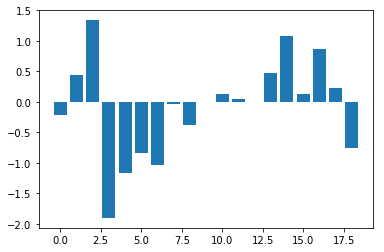

In [117]:
# get importance
importance = regr.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [118]:
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(outputs19, ncaa_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(outputs19, ncaa_pred))

Coefficients: 
 [ -2.07674495e-01   4.33092646e-01   1.33856324e+00  -1.90193389e+00
  -1.15969322e+00  -8.35323930e-01  -1.03857733e+00  -3.69002996e-02
  -3.82430429e-01  -3.92867206e-04   1.31763592e-01   4.85760348e-02
   5.84797634e-03   4.81307505e-01   1.07910627e+00   1.22204126e-01
   8.60164156e-01   2.20605032e-01  -7.47898793e-01]
Mean squared error: 0.58
Coefficient of determination: 0.41


In [119]:
fullData = pd.read_csv("cbb.csv")
cleaned = fullData.dropna()
cleaned = cleaned[cleaned.POSTSEASON != "R68"]
cleaned = cleaned.replace({"R32": 1, "R64": 0, "S16": 2, "E8": 3, "F4": 4, "2ND": 5, "Champions": 6})
cleaned['G'] = cleaned['G'] - cleaned['POSTSEASON'] - 1
index = (cleaned[cleaned['POSTSEASON']== 6].index.values)
cleaned = cleaned.set_value(index[0], 'G', cleaned.at[index[0],'G'] + 1)
cleaned = cleaned.set_value(index[1], 'G', cleaned.at[index[1],'G'] + 1)
cleaned = cleaned.set_value(index[2], 'G', cleaned.at[index[2],'G'] + 1)
cleaned = cleaned.set_value(index[3], 'G', cleaned.at[index[3],'G'] + 1)
cleaned = cleaned.set_value(index[4], 'G', cleaned.at[index[4],'G'] + 1)
cleaned['W'] = cleaned['W'] - cleaned['POSTSEASON']
cleaned = cleaned[cleaned.YEAR != 2019]

cleaned = cleaned.drop(["TEAM"], axis=1)
cleaned = cleaned.drop(["YEAR"], axis=1)
cleaned = cleaned.drop(["CONF"], axis=1)
cleaned = cleaned.drop(["SEED"], axis=1)
cleaned=(cleaned-cleaned.mean())/cleaned.std()
outputs = cleaned["POSTSEASON"]
cleaned = cleaned.drop(["POSTSEASON"], axis=1)

In [120]:
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(cleaned, outputs)
# Make predictions using the testing set
ncaa_pred = regr.predict(cleaned19)

In [121]:
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(outputs19, ncaa_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(outputs19, ncaa_pred))

Coefficients: 
 [-0.12385146  0.36329336  1.2469512  -1.61766182 -1.20153554 -0.1745961
  0.16408187 -0.01708374 -0.25671288 -0.04565091  0.31538017 -0.02087106
  0.0069542   0.18481637  0.18082162 -0.0556203   0.12203772  0.02476856
 -0.49585312]
Mean squared error: 0.38
Coefficient of determination: 0.61


In [122]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# find best params and score for Ridge
ridge = Ridge()

parameters = {'alpha': [1e-3, 1e-2, 1, 5, 10, 20]}

ridge_regressor = GridSearchCV(ridge, parameters, scoring="neg_mean_squared_error", cv=5)

ridge_regressor.fit(cleaned, outputs)

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 0.001}
-0.808771994914


In [123]:
ridge = Ridge(alpha=1e-3)
ridge.fit(cleaned,outputs)
predictions = ridge.predict(cleaned19)
print('Coefficients: \n', ridge.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(outputs19, predictions))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(outputs19, predictions))

Coefficients: 
 [-0.12380094  0.36317131  1.24672909 -1.61735927 -1.20135157 -0.17430676
  0.16381007 -0.01710664 -0.25660979 -0.04561445  0.31531221 -0.02086834
  0.00692169  0.18464866  0.18094685 -0.05572982  0.12210434  0.02476832
 -0.4956547 ]
Mean squared error: 0.38
Coefficient of determination: 0.61


In [124]:
from sklearn.linear_model import Lasso

# find best params and score for Lasso
lasso = Lasso()

parameters = {'alpha': [1e-3, 1e-2, 1, 5, 10, 20]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=10)

lasso_regressor.fit(cleaned, outputs)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.001}
-0.747907596213


In [125]:
lasso = Lasso(alpha=1e-3)
lasso.fit(cleaned,outputs)
predictions = lasso.predict(cleaned19)
print('Coefficients: \n', lasso.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(outputs19, predictions))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(outputs19, predictions))

Coefficients: 
 [-0.10567116  0.31492139  1.18117064 -1.5350334  -1.16529231 -0.
  0.12791253 -0.02675363 -0.22434374 -0.03031594  0.29149893 -0.01740353
 -0.          0.07698151  0.18013012 -0.12554784  0.11855664  0.02342229
 -0.42432646]
Mean squared error: 0.38
Coefficient of determination: 0.62
